# Thư viện Seaborn

Import các thư viện cần thiết:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In ra tên các tập dữ liệu có sẵn của seaborn:

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


Chọn một tập dữ liệu có sẵn và lưu vào biến:

In [4]:
tips_df = sns.load_dataset("tips")

Xem qua dữ liệu:

In [5]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Styling seaborn theme:

In [21]:
sns.set_theme() # return default theme

Distrubution plot:

* histogram:

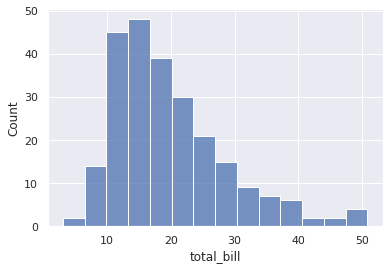

In [22]:
sns.histplot(data = tips_df["total_bill"]);

* KDE plot:

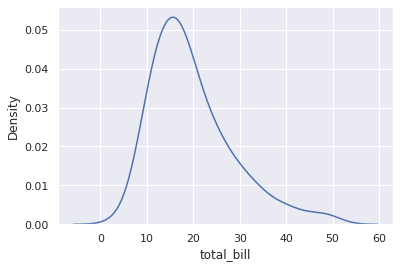

In [23]:
sns.kdeplot(data = tips_df["total_bill"]);

* Displot: Sự kết hợp của histogram và kde, tuy nhiên có nhiều chức năng hơn:

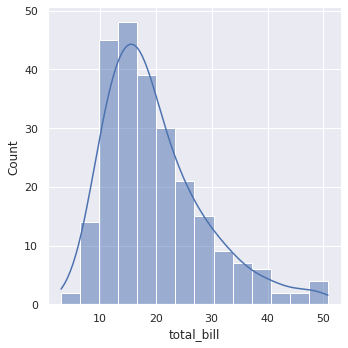

In [24]:
sns.displot(data = tips_df, x = "total_bill", kde = True);

Báy giờ chúng ta quan tâm time khác nhau thì histogram thay đổi như nào:

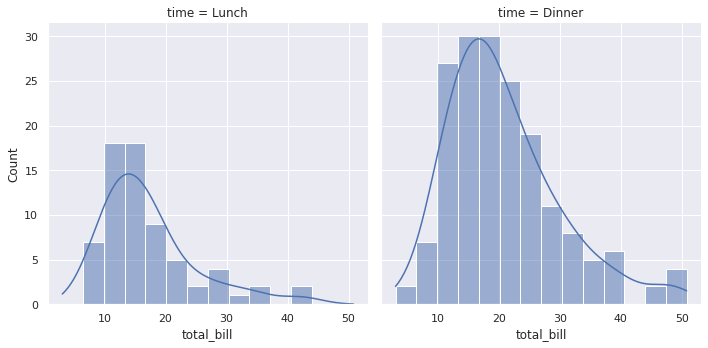

In [25]:
sns.displot(data = tips_df, x = "total_bill",col = "time" ,kde = True);

Bar plot: Trung bình nam, nữ ai trả tiền tip nhiều hơn:

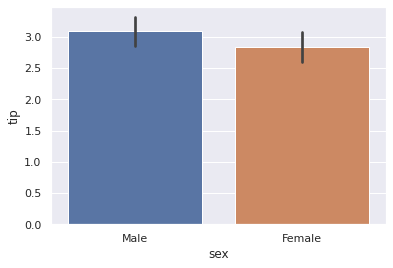

In [28]:
sns.barplot(data = tips_df, x = "sex",y = "tip" ,estimator = np.mean);

-> Kết luận: Nam hảo phóng hơn nữ :))

Count plot:

Trước tiên bạn có thể dùng hàm value_count:

In [31]:
tips_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Hoặc bạn có thể trực quan hóa như sau:

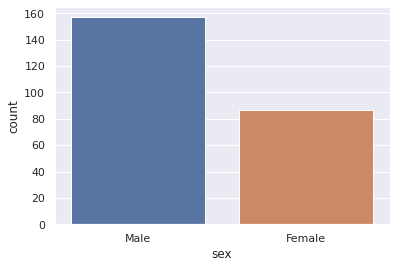

In [33]:
sns.countplot(data = tips_df, x = "sex");

Box plot: Phân phối tổng bill theo từng ngày:

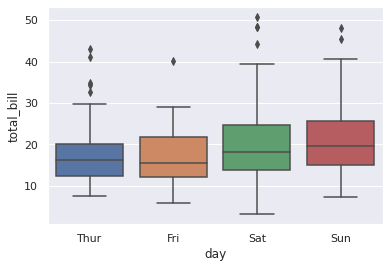

In [35]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill");

Nếu bạn quan tâm đến việc tổng bill nam và nữ riêng:

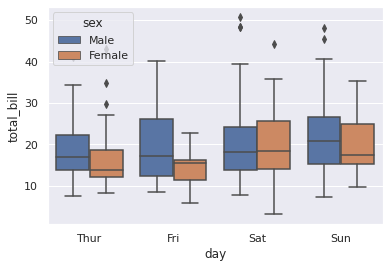

In [36]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex");

Muốn thay đổi bảng màu:

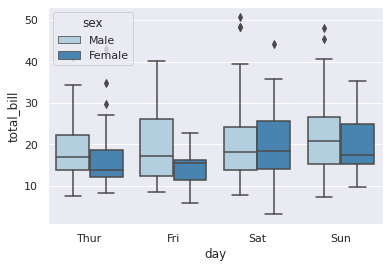

In [40]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex", palette = "Blues");

Nếu bạn ko muốn hiện từ "sex":

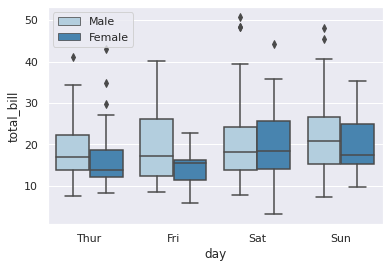

In [42]:
sns.boxplot(data = tips_df,x = "day", y = "total_bill", hue = "sex", palette = "Blues");
plt.legend(loc = 0);

Facet Grid: Mối tương quan giữa nhiều biến (thay vì hai biến như thông thường)

In [43]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


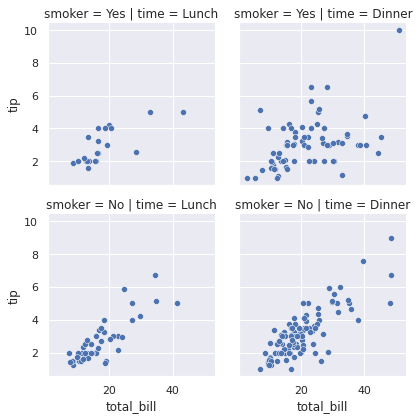

In [48]:
tips_fg = sns.FacetGrid(data = tips_df, row = "smoker", col = "time");
tips_fg.map(sns.scatterplot, "total_bill", "tip");

--> kết luận: Tổng bill càng lớn thì tiền tip càng lớn và một số thứ khác ✌

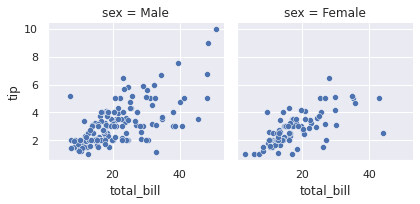

In [50]:
tips_fg = sns.FacetGrid(data = tips_df, col = "sex");
tips_fg.map(sns.scatterplot, "total_bill", "tip");

Muốn lady first:

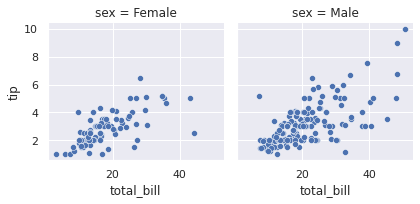

In [51]:
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"]);
tips_fg.map(sns.scatterplot, "total_bill", "tip");

Giờ mình muốn trong những người trong đó ai là người hút thuốc:

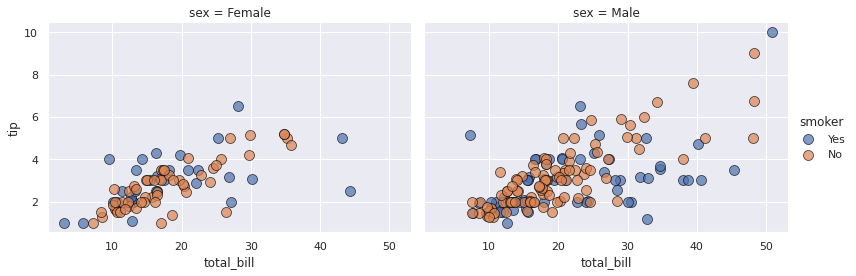

In [59]:
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"],
    hue = "smoker",
    height = 4,
    aspect = 1.4);
# height: chiều cao của biểu đồ
# aspect: chiều ngang của biểu đồ
# col_order: thứ tự cột trong grid
# s = 100: size của element trong biểu đồ
# edgecolor: màu đường viền của element
# alpha: độ mờ của element
tips_fg.map(sns.scatterplot, "total_bill", "tip", s = 100, edgecolor = 'black',
            alpha = 0.7);

# Add legend
tips_fg.add_legend();

Hoặc chúng ta có thể dùng dictionary argument như sau:

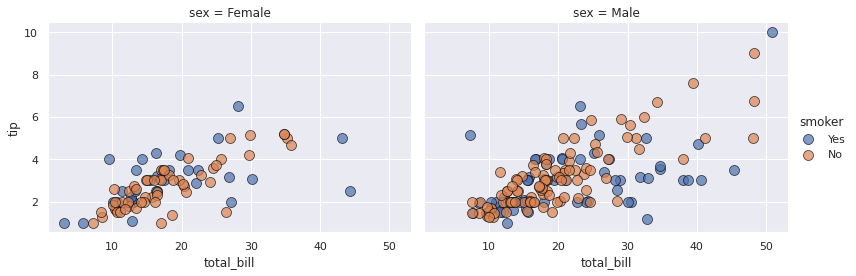

In [60]:
kws = dict(s = 100, edgecolor = 'black', alpha = 0.7)
tips_fg = sns.FacetGrid(
    data = tips_df, 
    col = "sex",
    col_order = ["Female", "Male"],
    hue = "smoker",
    height = 4,
    aspect = 1.4);
tips_fg.map(sns.scatterplot, "total_bill", "tip", **kws);

# Add legend
tips_fg.add_legend();